Importing the libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

Data collection and processing

In [2]:
# Loading the dataset to pandas Dataframe

df = pd.read_csv('/loan_data.csv')

In [3]:
# Verifying the data to make sure its the right data

df.head()

,Loan_ID,Gender,Marital_Status,Dependants,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_Score,Property_Area,Loan_Status
0,LP000001,Female,No,2,Graduate,No,7595.0,4981.0,625.0,240.0,486.0,Semiurban,N
1,LP000002,Female,Yes,1,Not Graduate,No,5577.0,1970.0,211.0,120.0,735.0,Semiurban,Y
2,LP000003,Female,Yes,0,Graduate,No,7926.0,2384.0,187.0,300.0,346.0,Semiurban,Y
3,LP000004,Male,No,3+,Graduate,No,5673.0,2079.0,502.0,360.0,823.0,Rural,Y
4,LP000005,Female,Yes,1,Graduate,No,5843.0,2262.0,107.0,360.0,353.0,Urban,Y


In [4]:
# Checking the number of rows and columns

df.shape

(20000, 13)

In [5]:
# Checking the columns data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             20000 non-null  object 
 1   Gender              19613 non-null  object 
 2   Marital_Status      19639 non-null  object 
 3   Dependants          19634 non-null  object 
 4   Education           19626 non-null  object 
 5   Self_Employed       19577 non-null  object 
 6   Applicant_Income    19795 non-null  float64
 7   Coapplicant_Income  19811 non-null  float64
 8   Loan_Amount         19798 non-null  float64
 9   Loan_Amount_Term    19784 non-null  float64
 10  Credit_Score        19791 non-null  float64
 11  Property_Area       20000 non-null  object 
 12  Loan_Status         20000 non-null  object 
dtypes: float64(5), object(8)
memory usage: 2.0+ MB


In [6]:
# Statistical Measures

df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_Score
count,19795.00000,19811.000000,19798.000000,19784.000000,19791.000000
mean,5763.35221,2489.789814,372.512880,308.224828,573.881108
std,2451.67417,1441.643679,187.433411,85.914433,158.942424
min,1500.00000,0.000000,50.000000,120.000000,300.000000
25%,3631.00000,1257.000000,211.000000,240.000000,436.000000
50%,5799.00000,2474.000000,370.000000,360.000000,574.000000
75%,7866.50000,3743.000000,535.000000,360.000000,712.000000
max,9999.00000,4999.000000,699.000000,360.000000,849.000000


In [7]:
# checking the number of missing values in each column

df.isnull().sum()

Loan_ID                 0
Gender                387
Marital_Status        361
Dependants            366
Education             374
Self_Employed         423
Applicant_Income      205
Coapplicant_Income    189
Loan_Amount           202
Loan_Amount_Term      216
Credit_Score          209
Property_Area           0
Loan_Status             0
dtype: int64

In [8]:
# Dropping the missing values

df = df.dropna()

In [9]:
# Confirnming that the missing values is dropped

df.isnull().sum()

Loan_ID               0
Gender                0
Marital_Status        0
Dependants            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_Score          0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Label Encoding  ( Changing the values in a column that has alphabets to numerical values for better accuracy)

df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
df.head()

,Loan_ID,Gender,Marital_Status,Dependants,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_Score,Property_Area,Loan_Status
0,LP000001,Female,No,2,Graduate,No,7595.0,4981.0,625.0,240.0,486.0,Semiurban,0
1,LP000002,Female,Yes,1,Not Graduate,No,5577.0,1970.0,211.0,120.0,735.0,Semiurban,1
2,LP000003,Female,Yes,0,Graduate,No,7926.0,2384.0,187.0,300.0,346.0,Semiurban,1
3,LP000004,Male,No,3+,Graduate,No,5673.0,2079.0,502.0,360.0,823.0,Rural,1
4,LP000005,Female,Yes,1,Graduate,No,5843.0,2262.0,107.0,360.0,353.0,Urban,1


In [12]:
# checking the values in the Dependants column

df['Dependants'].value_counts()

Dependants
2     4453
1     4398
0     4359
3+    4025
Name: count, dtype: int64

In [13]:
# Replacing the values of 3+ to 4

df = df.replace(to_replace='3+', value=4)

In [14]:
# confirming that the 3+ value is replaced with 4 in the Dependants column

df['Dependants'].value_counts()

Dependants
2    4453
1    4398
0    4359
4    4025
Name: count, dtype: int64

Data Visualization

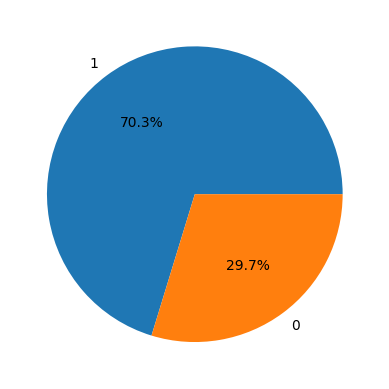

In [15]:
#Viewing the percentage or the loan approved and disapproved

temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Education', ylabel='count'>

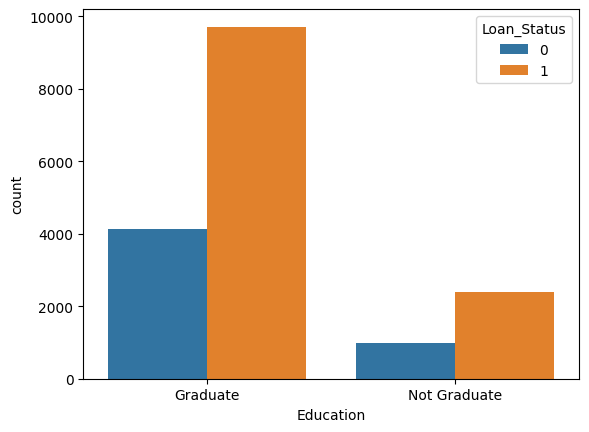

In [16]:
# Checking the impact of Education level on the loan approval

sns.countplot(x='Education', hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

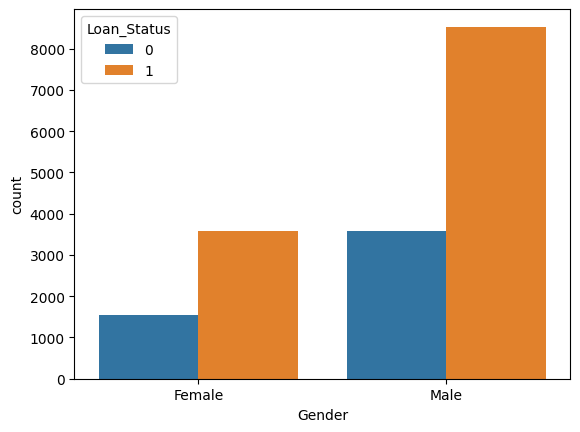

In [17]:
# Checking the impact of Education level on the loan approval

sns.countplot(x='Gender', hue='Loan_Status',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

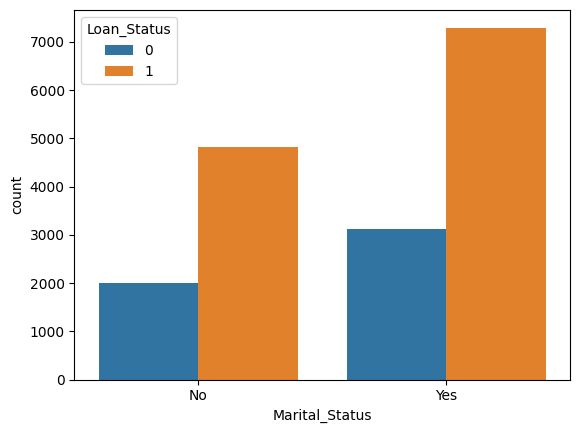

In [18]:
# Checking the impact of Marital Status on the loan approval

sns.countplot(x='Marital_Status', hue='Loan_Status',data=df)

In [19]:
# Changing categorical columns to numerical values

df.replace({'Marital_Status':{'No':0,'Yes':1}, 'Gender':{'Female':0,'Male':1}, 'Self_Employed':{'No':0,'Yes':1},
           'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}, 'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)

In [20]:
# Viewing the updated values

df.head()

,Loan_ID,Gender,Marital_Status,Dependants,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_Score,Property_Area,Loan_Status
0,LP000001,0,0,2,1,0,7595.0,4981.0,625.0,240.0,486.0,1,0
1,LP000002,0,1,1,0,0,5577.0,1970.0,211.0,120.0,735.0,1,1
2,LP000003,0,1,0,1,0,7926.0,2384.0,187.0,300.0,346.0,1,1
3,LP000004,1,0,4,1,0,5673.0,2079.0,502.0,360.0,823.0,0,1
4,LP000005,0,1,1,1,0,5843.0,2262.0,107.0,360.0,353.0,2,1


In [21]:
# Seperating the data and the labels

X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [22]:
print(X)
print(Y)

       Gender  Marital_Status Dependants  Education  Self_Employed  \
0           0               0          2          1              0   
1           0               1          1          0              0   
2           0               1          0          1              0   
3           1               0          4          1              0   
4           0               1          1          1              0   
...       ...             ...        ...        ...            ...   
19995       1               1          1          1              0   
19996       1               1          1          1              0   
19997       0               1          0          1              1   
19998       1               1          4          1              0   
19999       0               0          1          1              0   

       Applicant_Income  Coapplicant_Income  Loan_Amount  Loan_Amount_Term  \
0                7595.0              4981.0        625.0             240.0   
1  

Trainig Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, stratify = Y, random_state = 2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(17235, 11) (15511, 11) (1724, 11)


Training the model:

Support Vector Machine Model

In [25]:
Classifier = svm.SVC(kernel = 'linear')

Model Evaluation

In [26]:
# Training the support Vector Machine Model

Classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [37]:
# Accuracy score on training data

X_train_prediction = Classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [43]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.702727096898975


In [44]:
# Accuracy score on testing data

X_test_prediction = Classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [46]:
print('Accuracy on training data : ', test_data_accuracy)

Accuracy on training data :  0.7024361948955916
